<a href="https://colab.research.google.com/github/dsankush/Drug-Analysis/blob/main/Drug_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:
# To load data from file
import pandas as pd 

# To perform mathemetiacal operations
import numpy as np

from scipy import stats as st

# To visualize data and get insight from the data
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Pre-defining the color schema
# Pre-defining the color schema
sns.set_palette('gist_ncar')

### Loading Dataset from csv file

In [ ]:
# Mounting drive and read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Using pandas read_csv method to load the data
path = '/content/drive/MyDrive/Drug Analysis/drug200 (1).csv'
data = pd.read_csv(path)

### Getting the first 5 rows of the data.

In [ ]:
# using pandas head function.

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Getting the last 5 rows of the data.

In [ ]:
# using pandas tail function.

data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


### Getting the columns present in our data.

In [ ]:
# using pandas columns method

print('Columns in our data:')

data.columns.tolist()

Columns in our data:


['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

### Getting the shape of the data.

In [ ]:
# using pandas shape method to get the shape of our dataset

print('Shape of our dataset : ')
data.shape

Shape of our dataset : 


(200, 6)

In [ ]:
print('Number of columns : ',data.shape[1],'\n')

print('number of rows : ',data.shape[0])

Number of columns :  6 

number of rows :  200


* <b>Checking the data types of each column</b>

In [ ]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

### Getting the type of data present in columns.

In [ ]:
# printing the number of numerical features and number of categorical features 

num_col = data.select_dtypes(include = 'number')
print("The number of Numerical columns are:",len(num_col.columns))

cat_col = data.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))

The number of Numerical columns are: 2

The number of Categorical columns are: 4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


#### Summary Statistic of the numeric columns

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


#### Summary Statistic of object form data of columns

In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,DrugY,91


In [ ]:
# In our dataset there are lots of unique values in lots of columns 
# Getting the number of unique values present in these columns

# Using Dictionary Comprehension to get the dictionary of the columns containing more than 1 unique value

unique_count_dict = {column: len(data[column].unique()) for column in data.columns}

In [ ]:
# Creating seperate list of columns and count from the keys and values of the unique_count_dict

column_list = list(unique_count_dict.keys())
unique_value_count = list(unique_count_dict.values())

In [ ]:
# Creating the Dataframe to display the columns and there count of unique values

unique_count_df = pd.DataFrame({'Column_name' : column_list, 'Number_of_Unique_Values' : unique_value_count})

# Sorting this above unique_count_df in ascending order to get to count of unique values present in each column
# Also used reset_index to reset the index and drop the previous index as it was shuffled while sorting values

unique_count_df.sort_values(by = ['Number_of_Unique_Values']).reset_index(drop = True)

,Column_name,Number_of_Unique_Values
0,Sex,2
1,Cholesterol,2
2,BP,3
3,Drug,5
4,Age,57
5,Na_to_K,198


### Data Cleaning and Removal of duplicate enteries from the Data

As data cleaning is an important task before we perform any kind of analysis on dataset, we will remove or replace the not necessary data from our dataset so that we can get desired outputs by performing EDA on it.

We have perfrom following cleaning strategy to overcome the data ambiguity:


* Getting missing data
* Handling missing data
* Checking for duplicate data
* Removing duplicate data

In [ ]:
# Using isnull() from Pandas to get the Null/NaN values in the each column in dataset and 
# sum() is use to get the sum of missing values present in each column in dataset

print(data.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


# Inference

* Here we can see that there is <b>no missing value</b> in any feature of our data.


* So we donot need to perform the missing value handling task

* <b>Checking for duplicate data</b>

In [ ]:
data[data.duplicated()].size

0

* There is also <b>not any duplicate data</b> present in our dataset.

# Exploratory Data Analysis

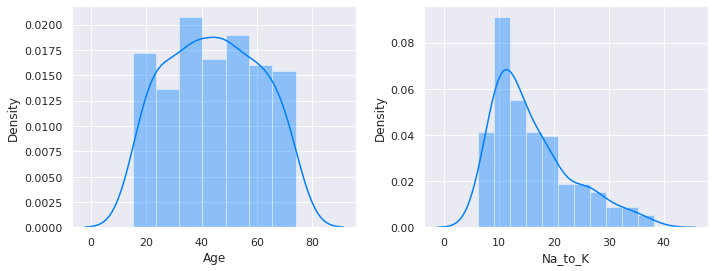

In [ ]:
# ploting distribution for each numerical variable present in our data set
# using distplot from seaborn

columns = data.select_dtypes(include=np.number).columns.tolist()

n = 1

plt.figure(figsize=(20,15))

for column in columns:   
    
    plt.subplot(4,4,n)
    
    n = n+1
    sns.distplot(data[column])
    
    plt.tight_layout()

### Outlier Detection

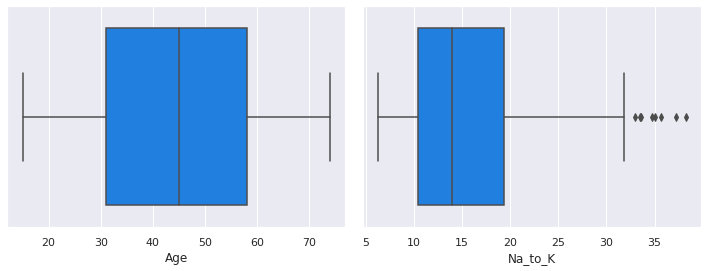

In [ ]:
# ploting the box plots into subplots of each column

columns = data.select_dtypes(include=np.number).columns.tolist()
n = 1

plt.figure(figsize=(20,15))

for column in columns:
    plt.subplot(4,4,n)
    n = n+1
    sns.boxplot(data[column])
    plt.tight_layout()
    

## Univariate Analysis

* <b>Let us go through variables individually and analyse them.</b>

#### Gender Column

In [ ]:
# Getting the value count for each gender using value_counts from pandas
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
# Percentage For each gender
(data['Sex'].value_counts() / data['Sex'].count()) * 100

M    52.0
F    48.0
Name: Sex, dtype: float64

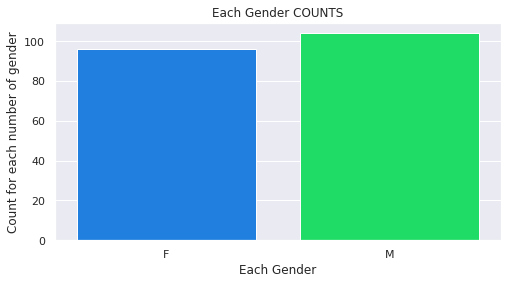

In [ ]:
# Ploting count plot for Gender column

plt.figure(figsize = (8, 4))

sns.countplot(data['Sex'])

plt.title('Each Gender COUNTS')

plt.xlabel('Each Gender')
plt.ylabel('Count for each number of gender')

plt.show()

#### BP(Blood Pressure) Column

In [ ]:
# Getting the value count for each BP category using value_counts from pandas
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
# Percentage For Each level of BP
(data['BP'].value_counts() / data['BP'].count()) * 100

HIGH      38.5
LOW       32.0
NORMAL    29.5
Name: BP, dtype: float64

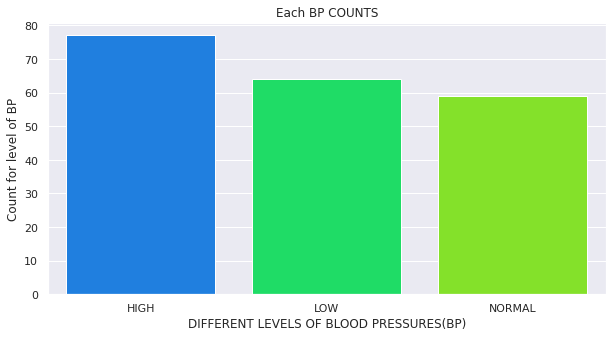

In [ ]:
# Ploting count plot for BP column

plt.figure(figsize = (10, 5))

sns.countplot(data['BP'])

plt.title('Each BP COUNTS')

plt.xlabel('DIFFERENT LEVELS OF BLOOD PRESSURES(BP)')
plt.ylabel('Count for level of BP')

plt.show()

####  Cholesterol Column

In [ ]:
# Getting the value count for each Cholesterol using value_counts from pandas
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
# Percentage For Each level of Cholesterol
(data['Cholesterol'].value_counts() / data['Cholesterol'].count()) * 100

HIGH      51.5
NORMAL    48.5
Name: Cholesterol, dtype: float64

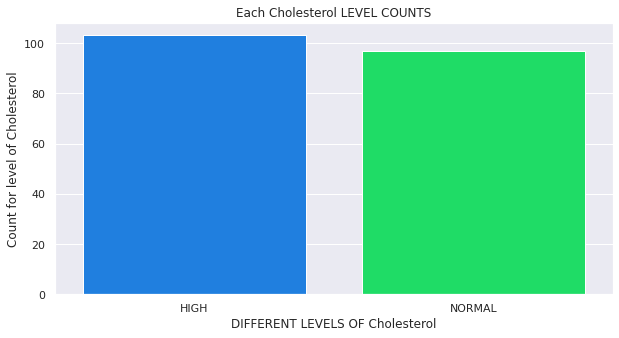

In [ ]:
# Ploting count plot for Cholesterol column

plt.figure(figsize = (10, 5))

sns.countplot(data['Cholesterol'])

plt.title('Each Cholesterol LEVEL COUNTS')

plt.xlabel('DIFFERENT LEVELS OF Cholesterol')
plt.ylabel('Count for level of Cholesterol')

plt.show()